<a href="https://colab.research.google.com/github/vjolivera/Analise_dados-projetos/blob/main/N%C2%BA_de_Interna%C3%A7%C3%B5es_por_regi%C3%B5es_do_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
df= pd.read_csv('/content/A151602189_28_143_208.csv',encoding = 'ISO-8859-1',
                    skiprows = 3, sep=';',skipfooter=12,
                    thousands = ".", decimal =',', engine = 'python')
df.head()

,Região/Unidade da Federação,2016/Jun,2016/Jul,2016/Ago,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Região Norte,1,-,-,-,-,1,4,33,172,1087,6348,15410,42139,80370,85034,81015,84221,80369,78072,82348,75118,84514,86093,87762,82756,83045,86364,82898,87416,80518,78308,83195,78261,85675,85157,86916,80691,85361,86037,86117,88780,85187,81972,85894,81267,78625,62049,66211,68551,75217,76332,74475,75745,71856,70742,67387,47889,28833,3595838
1,.. Rondônia,1,-,-,-,-,-,2,5,19,75,425,1368,4418,9453,10057,9594,10208,9734,9668,9775,9161,10508,10333,10913,10051,10068,10339,9821,10357,10086,9561,9448,9580,10572,10785,11290,9995,9940,9942,10147,10367,10365,9861,9837,9506,8710,7156,7434,7638,8376,8848,8379,8791,8865,8362,7221,4779,2106,424300
2,.. Acre,-,-,-,-,-,-,-,1,6,32,102,529,2089,3920,4025,3826,3990,3956,3666,3963,3523,3964,4010,3948,3844,3963,4054,3784,3959,3117,3024,3509,3162,3259,3589,4065,3986,4032,3872,3971,4112,3650,3596,3840,3792,3648,2829,2818,3029,3549,3574,3724,3973,3834,3821,3588,2898,1788,166803
3,.. Amazonas,-,-,-,-,-,-,-,6,12,84,1410,2263,7885,14971,15555,14415,15447,14493,14329,15371,13688,15559,15958,16321,15376,16276,16129,15388,16098,15183,14726,16056,14900,16965,16363,16663,16043,16828,17190,16336,16995,16072,15462,16599,15464,15343,12285,13272,13943,15417,15709,15727,15796,15424,16213,16344,10777,6256,697385
4,.. Roraima,-,-,-,-,-,-,-,-,3,55,201,634,1520,3727,3814,3735,3760,3621,3522,3663,3242,3477,3416,3727,3813,3939,4048,3814,3779,3258,3286,3516,3329,3463,3636,3632,3507,3922,4084,3956,4199,3925,3551,3731,3593,3452,2584,2884,2974,3080,3332,3302,3404,3248,3358,3356,2855,2154,160081


In [3]:
pd.options.display.float_format = '{:.2f}'.format
df2 = df.set_index('Região/Unidade da Federação')


No quadro abaixo podemos dar uma primeira olhdas nas métricas estudadas,
Podemos Verificar :


1. A média dos Nº de internações para cada Ano/mês
2. Nº máximo e mínimo de internçãoes para cada Ano/mês



In [4]:
df2.describe()

,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
count,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00
mean,166.56,666.88,3658.31,10289.38,29044.31,61271.00,63461.69,59210.25,61520.12,58900.25,56580.50,60899.69,54861.44,63737.94,64088.81,64775.12,61701.44,63414.69,64641.94,60788.19,64330.25,60231.81,57631.62,62115.94,58681.69,63157.69,65297.44,68099.19,62545.81,65775.75,65126.88,63976.94,66213.88,61646.06,58952.69,62978.69,59083.31,57773.38,44760.94,48742.25,50232.88,53752.56,54370.94,55609.06,57616.19,56407.94,53642.12,51058.56,41732.44,27891.69,2683160.94
std,272.85,819.94,4447.16,12873.10,37930.09,84805.84,87711.18,81842.47,84925.59,81279.80,78053.29,84298.00,75862.73,88209.24,88317.49,89205.76,85265.13,87345.50,89336.17,83636.95,88878.32,83137.06,79708.86,86061.10,81170.40,86929.45,90092.40,94163.15,86435.42,90520.39,89787.73,88004.47,91276.20,84604.94,81036.61,86968.86,81205.81,79496.95,61146.13,67401.93,69433.79,74652.43,75539.54,77326.94,79810.64,78772.90,75075.66,72389.86,61049.15,43914.69,3709878.82
min,1.00,11.00,48.00,440.00,1520.00,2844.00,3091.00,2938.00,2834.00,2663.00,2484.00,2744.00,2540.00,2797.00,3101.00,3139.00,3041.00,3132.00,3508.00,3510.00,3576.00,3117.00,3024.00,3454.00,3162.00,3259.00,3542.00,3272.00,3329.00,3356.00,3147.00,3494.00,3476.00,3298.00,3013.00,3313.00,3143.00,2956.00,2295.00,2526.00,2617.00,2746.00,2993.00,2822.00,2251.00,475.00,407.00,433.00,480.00,650.00,137325.00
25%,11.50,81.75,701.75,2255.50,6716.50,14767.25,15336.75,14016.50,14576.25,13850.25,13267.75,13940.00,12755.50,15272.75,15377.50,15877.75,14518.25,15271.50,15444.25,14446.25,15142.00,14158.25,13645.00,14420.75,13751.50,14960.25,15773.25,16486.75,14999.75,15691.50,15758.50,15323.25,15513.00,14417.00,13963.25,14688.75,14038.00,14141.00,10812.75,11392.50,12060.50,12827.25,12486.75,12670.50,13619.75,13344.75,13095.25,12205.00,10180.00,6127.50,634064.00
50%,40.50,323.50,1909.50,5185.00,13028.00,32124.00,32951.00,31197.00,32946.00,31687.50,30801.50,32671.00,30151.50,34270.50,34770.50,34994.50,32380.50,33118.50,34358.00,33212.00,34183.00,31987.50,30746.50,33007.00,30804.50,33951.00,35165.50,35842.00,32602.00,33707.50,33711.50,33349.00,34330.50,32791.00,31755.50,33484.00,31482.50,30695.50,23235.50,25578.00,26827.00,28832.00,29339.00,29663.00,30878.00,29055.50,27025.00,25707.00,21000.50,12988.50,1416729.50
75%,204.25,959.25,4594.50,12635.75,35468.50,70352.25,72140.25,66734.25,69375.50,66628.25,63314.75,68673.75,60868.50,71339.75,72177.75,73408.75,68366.75,72528.50,73185.50,69536.00,73039.75,68324.75,65359.75,69020.00,66248.50,70360.50,73819.50,78353.25,69889.25,75666.25,73550.00,71720.00,74570.75,69008.00,64231.50,68692.75,65871.25,64584.50,49077.00,51817.25,53233.75,55682.75,57059.50,59754.50,63901.50,61314.75,56218.50,53441.75,43349.25,26914.50,2975612.25
max,1175.00,3290.00,20149.00,57990.00,171762.00,385010.00,399080.00,372972.00,386422.00,369280.00,356141.00,384517.00,346394.00,402803.00,400501.00,404069.00,388379.00,395751.00,405363.00,379571.00,403494.00,377988.00,364134.00,393065.00,370671.00,396468.00,410278.00,427978.00,394612.00,411305.00,409142.00,401221.00,415654.00,384574.00,371062.00,398120.00,370931.00,364126.00,282716.00,313715.00,321655.00,346996.00,351134.00,357234.00,365316.00,362872.00,349480.00,337705.00,285158.00,210757.00,16979831.00


In [5]:
lista1 = ['Região Norte','Região Nordeste', 'Região Sudeste','Região Sul','Região Centro-Oeste']
df2.loc[lista1, 'Total']  

Região/Unidade da Federação
Região Norte            3595838
Região Nordeste        11440279
Região Sudeste         16979831
Região Sul              7592296
Região Centro-Oeste     3322331
Name: Total, dtype: int64

O gráfico nos mostra  os  números de internações por regiões do Brasil, 
Esse seria uma boa olhada para investigarmos se existe uma discrepancia entre população x dados de internação. 

Porém não é isso que observamos quando analisamos os dados abaixo, dados esses retirado do buscado Google em 24/05/2021. Dados de 16/10/2019.

Isso mostra que o número de internações segue uma distruição coerente, ou seja onde existe um maior número de habitantes há um maior número de internações.


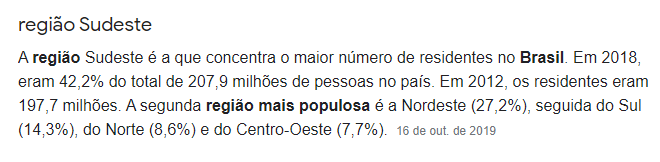

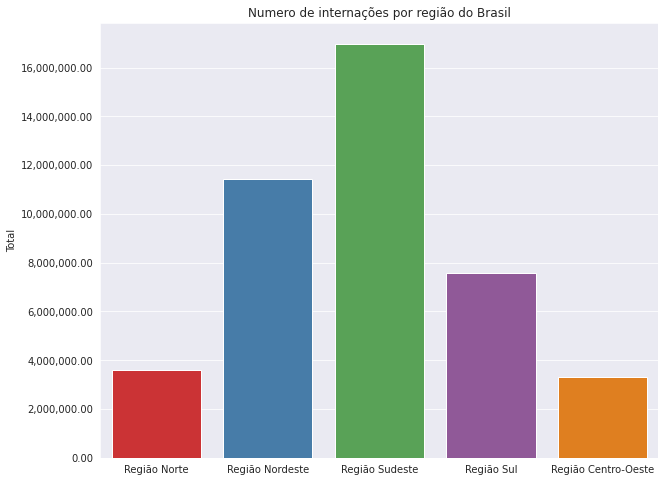

In [6]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('Set1', 5))
rx = sns.barplot( x = lista1, y = 'Total', data = df2.loc[lista1, ['Total']])
rx.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Numero de internações por região do Brasil')
plt.show()

Aqui vamos investigar o número de internação por estado dividido por regiões>
Verificamos  que os Estados que apresentam o maiores números de internações são:


*   Amazonas
*   São Paulo 
*   Paraná
*   Goiás
*   Bahia







In [7]:
#Definição das regiões
norte = df2.loc[['.. Rondônia','.. Acre','.. Tocantins','.. Amapá','.. Roraima','.. Amazonas']]
nordeste = df2.loc[['.. Sergipe','.. Alagoas','.. Pernambuco','.. Paraíba','.. Rio Grande do Norte','.. Ceará','.. Piauí','.. Maranhão','.. Bahia']]
sudeste = df2.loc[['.. Minas Gerais','.. Espírito Santo','.. Rio de Janeiro','.. São Paulo']]
sul = df2.loc[['.. Paraná','.. Santa Catarina','.. Rio Grande do Sul']]
centro_oeste_e_df = df2.loc[['.. Distrito Federal','.. Goiás','.. Mato Grosso','.. Mato Grosso do Sul']]

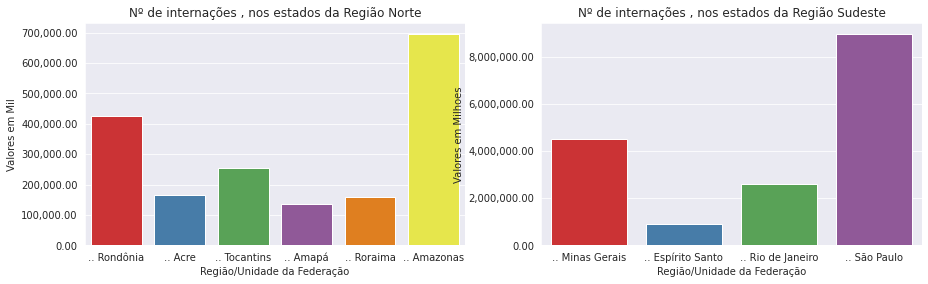

In [8]:
plt.figure(figsize=(15,9))
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('Set1', 6))
plt.subplot(2, 2, 1)
nox = sns.barplot(x= norte.index, y= 'Total', data = norte)
nox.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.ylabel('Valores em Mil')
plt.title('Nº de internações , nos estados da Região Norte')
plt.subplot(2, 2, 2)
ax = sns.barplot(x= sudeste.index, y= 'Total', data = sudeste )
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Nº de internações , nos estados da Região Sudeste')
plt.ylabel('Valores em Milhoes')
plt.show()

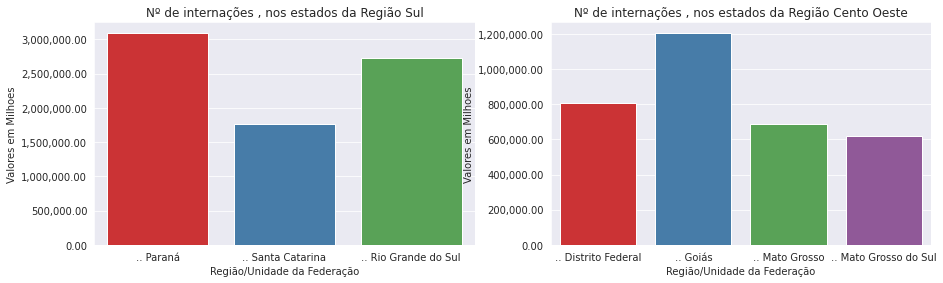

In [9]:
plt.figure(figsize=(15,9))
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('Set1',5))
plt.subplot(2, 2 ,1)
sx = sns.barplot(x= sul.index, y= 'Total', data = sul)
sx.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.ylabel('Valores em Milhoes')
plt.title('Nº de internações , nos estados da Região Sul')
plt.subplot(2, 2, 2)
cox = sns.barplot(x= centro_oeste_e_df.index, y= 'Total', data = centro_oeste_e_df )
cox.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Nº de internações , nos estados da Região Cento Oeste')
plt.ylabel('Valores em Milhoes')
plt.show()

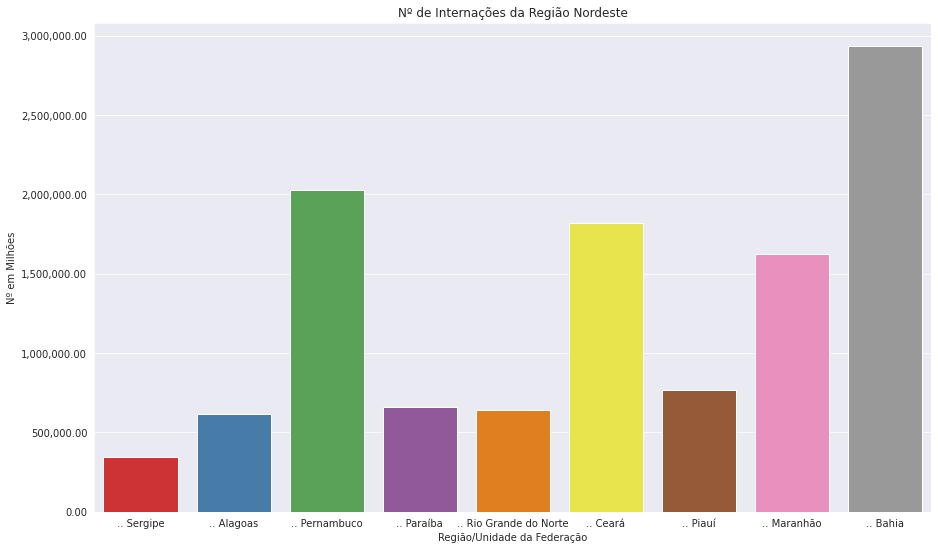

In [21]:
plt.figure(figsize = (15,9))
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('Set1', 9))
nrx = sns.barplot(x = nordeste.index, y = 'Total', data = nordeste)
nrx.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.ylabel('Nº em Milhões')
plt.title('Nº de Internações da Região Nordeste')
plt.show()

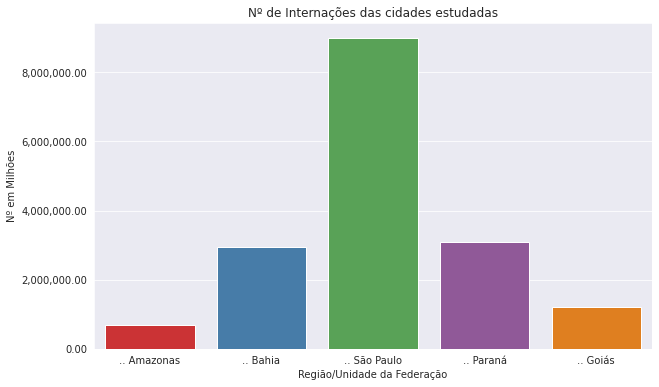

In [11]:
#Vizualização dos comparativo entre os estados apontados
estados = df2.loc[['.. Amazonas','.. Bahia','.. São Paulo','.. Paraná','.. Goiás']]
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('Set1', 9))
ex = sns.barplot(x = estados.index, y = 'Total', data = estados)
ex.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.ylabel('Nº em Milhões')
plt.title('Nº de Internações das cidades estudadas')
plt.show()
